In [ ]:
# preset functions and imports !!!caution don't modify!!!
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random
import pandas as pd
import os
import numpy as np
import graphviz
import re
from sklearn.preprocessing import LabelEncoder
os.getcwd()

def xs_y(df):
    xs = df[cats+conts].copy()
    return xs,df[dep] if dep in df else None

def _side_score(side, y):
    tot = side.sum()
    if tot<=1: return 0
    return y[side].std()*tot

def score(col, y, split):
    lhs = col<=split
    return (_side_score(lhs,y) + _side_score(~lhs,y))/len(y)

def min_col(df, nm):
    col,y = df[nm],df[dep]
    unq = col.dropna().unique()
    scores = np.array([score(col, y, o) for o in unq if not np.isnan(o)])
    idx = scores.argmin()
    return unq[idx],scores[idx]

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

In [ ]:
# download dataset
!wget https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv

--2022-08-25 04:38:52--  https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44028 (43K) [text/plain]
Saving to: ‘pokemon.csv.1’

pokemon.csv.1       100%[===================>]  43.00K  --.-KB/s    in 0.006s  

2022-08-25 04:38:52 (7.02 MB/s) - ‘pokemon.csv.1’ saved [44028/44028]



In [ ]:
# read csv
df = pd.read_csv('./pokemon.csv')
labelencoder = LabelEncoder()
df=pd.DataFrame(df)
df['Legendary'] = labelencoder.fit_transform(df['Legendary'])
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,1
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,1
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,1
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,1


In [ ]:
# get the mode of attributes
modes = df.mode().iloc[0]
modes

#                 479.0
Name          Abomasnow
Type 1            Water
Type 2           Flying
Total             600.0
HP                 60.0
Attack            100.0
Defense            70.0
Sp. Atk            60.0
Sp. Def            80.0
Speed              50.0
Generation          1.0
Legendary           0.0
Name: 0, dtype: object

In [ ]:
# convert categorical attributes 類別轉數值012
# ???

labelencoder = LabelEncoder()
df=pd.DataFrame(df)
df['Type 1'] = labelencoder.fit_transform(df['Type 1'])
df['Type 2'] = labelencoder.fit_transform(df['Type 2'])
# ??? 
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,9,13,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,9,13,405,60,62,63,80,80,60,1,0
2,3,Venusaur,9,13,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,9,13,625,80,100,123,122,120,80,1,0
4,4,Charmander,6,18,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,15,4,600,50,100,150,100,150,50,6,1
796,719,DiancieMega Diancie,15,4,700,50,160,110,160,110,110,6,1
797,720,HoopaHoopa Confined,14,8,600,80,110,60,150,130,70,6,1
798,720,HoopaHoopa Unbound,14,1,680,80,160,60,170,130,80,6,1


In [ ]:
# set categorical attributes and continuous attributes also the dependant attribute 那些是類別 哪些是數值

cats = ['Type 1','Type 2']
conts = ['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
dep = "Legendary"

import seaborn as sns

fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.barplot(data=df, y=dep, x="Sex", ax=axs[0]).set(title="Survival rate")
sns.countplot(data=df, x="Sex", ax=axs[1]).set(title="Histogram");

In [ ]:
# splite data into trainning and validation sets.
random.seed(42)
trn_df, val_df = train_test_split(df, test_size=0.25)
trn_df[cats] = trn_df[cats].astype("category")
val_df[cats] = val_df[cats].astype("category")
trn_df[cats] = trn_df[cats].apply(lambda x: x.cat.codes)
val_df[cats] = val_df[cats].apply(lambda x: x.cat.codes)

In [ ]:
# split independent/depedent attributes from training/validation datas.
trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)
from sklearn.metrics import mean_absolute_error
preds = val_xs.Total>550
mean_absolute_error(val_y, preds)

0.075

In [ ]:
# OneR classifier
OneR = {o: min_col(trn_df, o)for o in (cats+conts)}
# show the best parameter/threshold for OneR classification
print(
    "Best Parameter:",
    min(OneR, key=(lambda x: OneR[x][1]))
)
OneR

Best Parameter: Total


{'Type 1': (0, 0.2668286800661275),
 'Type 2': (1, 0.27640258324648675),
 'Total': (575, 0.07252427259161259),
 'HP': (78, 0.20358923727457512),
 'Attack': (84, 0.22526124776983583),
 'Defense': (69, 0.23010950026341978),
 'Sp. Atk': (69, 0.21094305050561515),
 'Sp. Def': (71, 0.2145090908500026),
 'Speed': (89, 0.21713504658419594)}

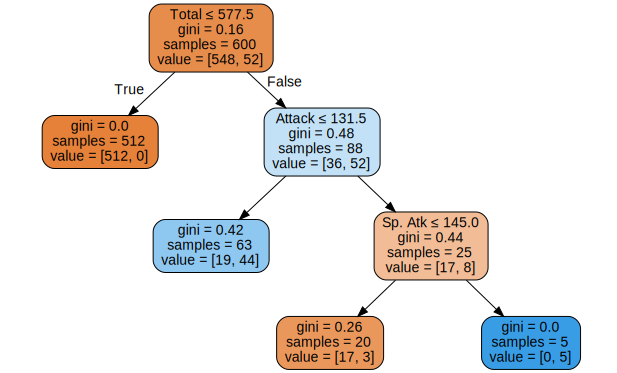

In [ ]:
# print the MAE of the OneR classification result on validation dataset
m = DecisionTreeClassifier(max_leaf_nodes=4).fit(trn_xs, trn_y);
draw_tree(m, trn_xs, size=10)


In [ ]:
mean_absolute_error(val_y,m.predict(val_xs))

0.055

In [ ]:
# create random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, min_samples_leaf=5)
rf.fit(trn_xs, trn_y);
rf

RandomForestClassifier(min_samples_leaf=5)

In [ ]:
# show the MAE of the random forest classification result on validation dataset
mean_absolute_error(val_y, rf.predict(val_xs))

0.06